# Temperature Project



This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have imported all necessary libraries.

In [2]:
#Importing Dataset
df=pd.read_csv('temperature.csv')

We have loaded dataset here.

In [3]:
#Checking Dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


This is our dataset on which we would do different operations. 

Let's check the features present in our data and then we will look at their data types.

In [4]:
#Checking Shape of Dataframe
df.shape

(7752, 25)

We have 24 independent variables and 1 target variable. We will predict the 'Next_Tmax','Next_Tmin' with the help of model built using the train data. Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [5]:
#Droping station and Date columns
df=df.drop(['station','Date'],axis=1)

In [6]:
#Checking Datatypes of columns of Dataframe
df.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

These are data types of columns of our dataset.

In [7]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see, their is so many null values are present in dataset, so we have to replace it with proper value

In [8]:
col=['Next_Tmax','Next_Tmin','Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']


In [9]:
#Replacing null value in above column by 0
df[col]=df[col].replace(np.nan,0)

In [10]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Checking different values total counts in the column

In [11]:
df['LDAPS_CC1'].value_counts()

0.000000    183
0.967277      2
0.081400      1
0.271888      1
0.051230      1
           ... 
0.001239      1
0.494226      1
0.104894      1
0.281367      1
0.315165      1
Name: LDAPS_CC1, Length: 7569, dtype: int64

# EDA

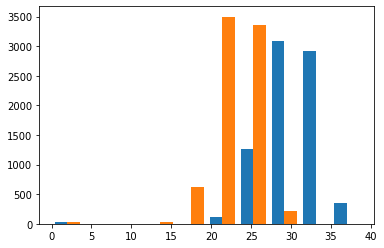

In [12]:
#Histogram plot
plt.hist([df['Next_Tmax'],df['Next_Tmin']])
plt.show()

We can see the graph of Next_Tmax and Next_Tmin. In above plot orange bars are for Next_Tmax and blue bars are for Next_Tmin 

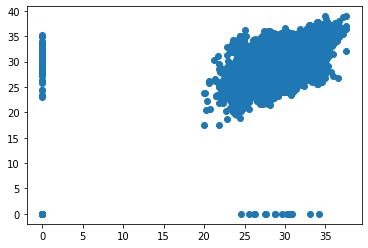

In [13]:
#Scatter plot
plt.scatter(df['Present_Tmax'],df['Next_Tmax'])

In above scatter plot we can observe the relation between Present_Tmax and Next_Tmax

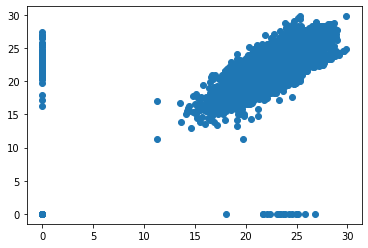

In [14]:
#Scatter plot
plt.scatter(df['Present_Tmin'],df['Next_Tmin'])

In above scatter plot we can observe the relation between Present_Tmin and Next_Tmin

# Correlation

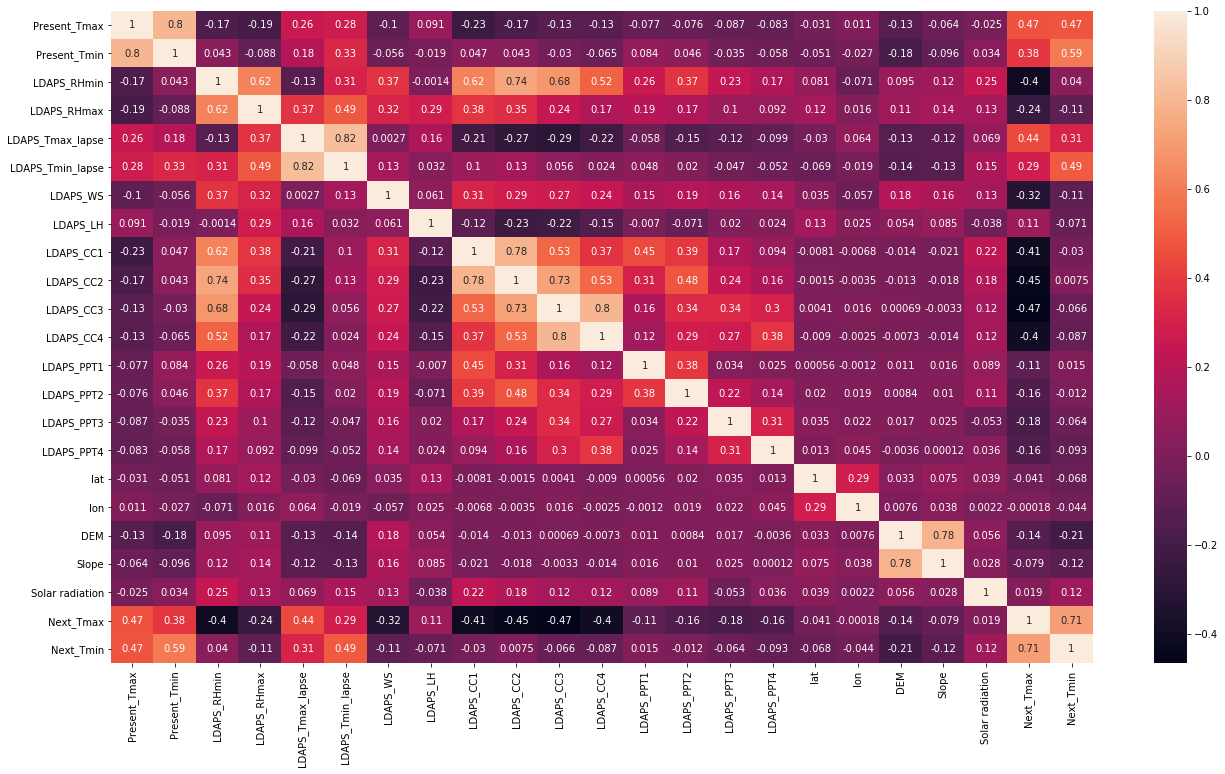

In [15]:
#Checking correlation
corr=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.show()

In [16]:
#Checking Statistical information
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.499407,23.015338,56.210230,87.519784,29.326939,23.285106,7.029203,61.900288,0.365206,0.352635,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.169440,22.852348
std,4.083116,3.256071,15.618676,11.227876,4.123757,3.277967,2.281613,34.120103,0.263668,0.259164,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.596114,2.827042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,0.000000,0.000000
25%,27.700000,21.600000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,0.141643,0.136090,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,29.900000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,0.309148,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


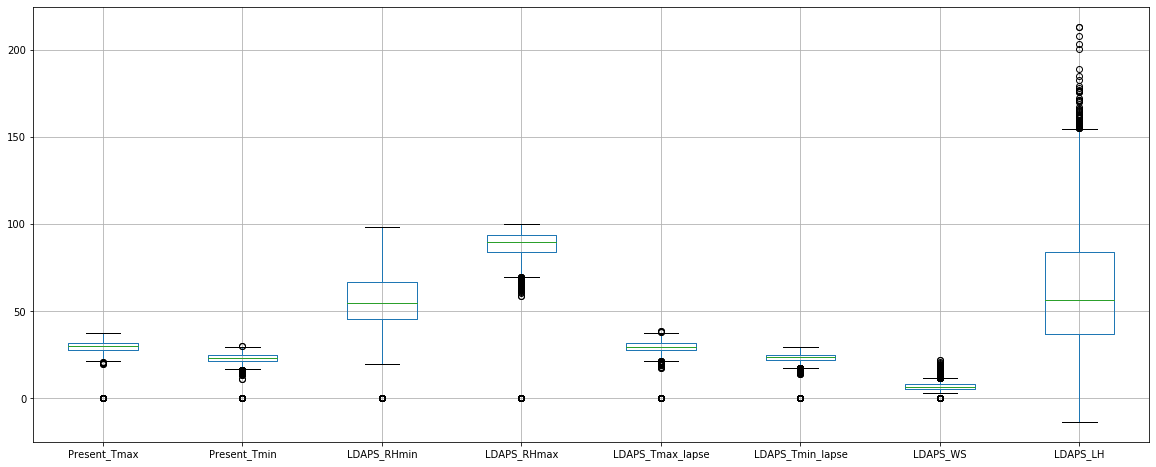

In [17]:
#Checking outliers with Boxplot Graph
df.iloc[:,0:8].boxplot(figsize=[20,8])

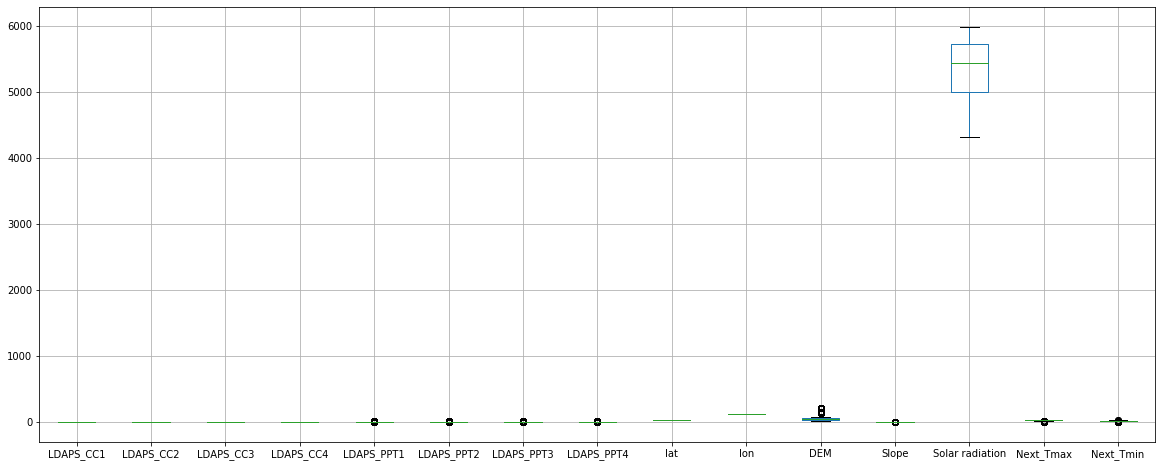

In [18]:
#Checking outliers with Boxplot Graph
df.iloc[:,8::].boxplot(figsize=[20,8])

In [19]:
#Removing outliers
from scipy import stats
z=np.abs(stats.zscore(df))
df_new=(z<2).all(axis=1)
df=df[df_new]

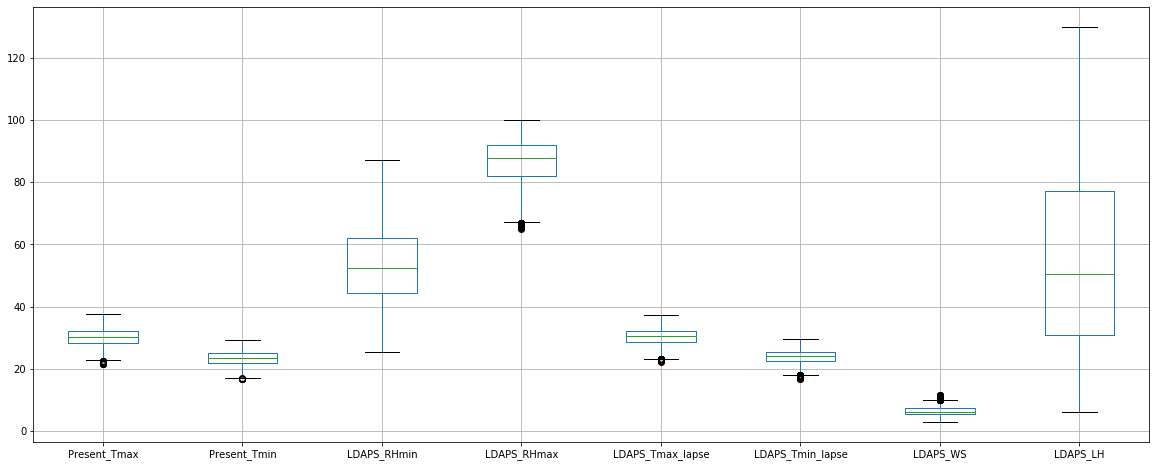

In [20]:
#Checking outliers with Boxplot Graph
df.iloc[:,0:8].boxplot(figsize=[20,8])

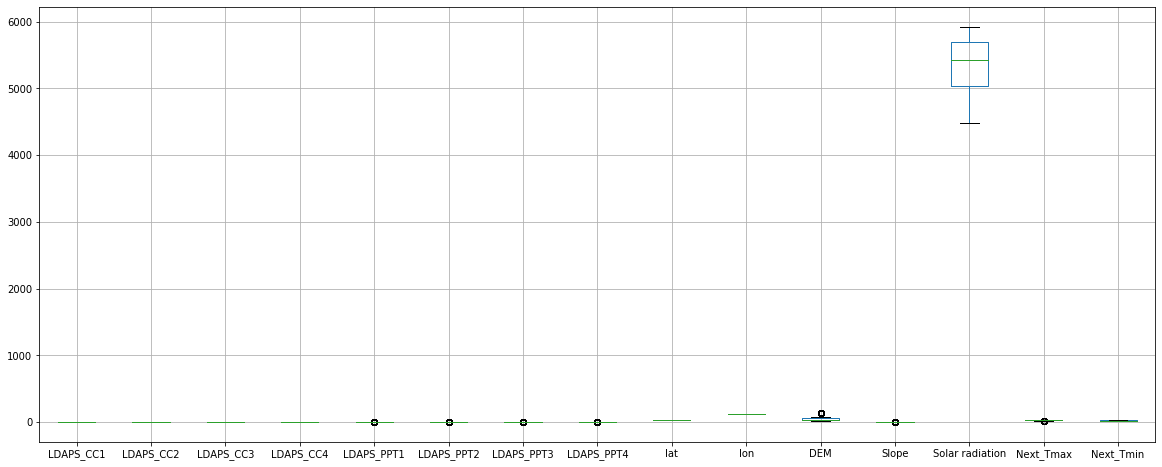

In [21]:
#Checking outliers with Boxplot Graph
df.iloc[:,8::].boxplot(figsize=[20,8])

In [22]:
#X,Y split
X=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
Y=df[['Next_Tmax','Next_Tmin']]

In [23]:
# Checking Skewness
X.skew()

Present_Tmax       -0.317103
Present_Tmin       -0.142627
LDAPS_RHmin         0.273271
LDAPS_RHmax        -0.647662
LDAPS_Tmax_lapse   -0.181871
LDAPS_Tmin_lapse   -0.346138
LDAPS_WS            0.809621
LDAPS_LH            0.510024
LDAPS_CC1           0.602932
LDAPS_CC2           0.443764
LDAPS_CC3           0.591554
LDAPS_CC4           0.686613
LDAPS_PPT1          4.441583
LDAPS_PPT2          5.963525
LDAPS_PPT3          6.198053
LDAPS_PPT4          6.705241
lat                 0.278909
lon                -0.206015
DEM                 1.531323
Slope               1.081363
Solar radiation    -0.485897
dtype: float64

In [24]:
#Improving Skewness
from sklearn.preprocessing import power_transform
pt=power_transform(X, method='yeo-johnson')
X=pd.DataFrame(pt,columns=X.columns)
X.skew()

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\PRIYA\anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\PRIYA\anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Present_Tmax       -0.031122
Present_Tmin       -0.024625
LDAPS_RHmin        -0.017285
LDAPS_RHmax        -0.095596
LDAPS_Tmax_lapse   -0.012963
LDAPS_Tmin_lapse   -0.030806
LDAPS_WS            0.001065
LDAPS_LH           -0.071819
LDAPS_CC1           0.054437
LDAPS_CC2           0.035971
LDAPS_CC3           0.071701
LDAPS_CC4           0.141933
LDAPS_PPT1          1.861042
LDAPS_PPT2          2.075448
LDAPS_PPT3          2.245588
LDAPS_PPT4          2.477718
lat                 0.255820
lon                -0.139965
DEM                 0.012232
Slope               0.187854
Solar radiation    -0.161801
dtype: float64

In [25]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [26]:
#Finding Best Random State
max_score=0
max_state=0
for i in range(0,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=i,test_size=0.3)
    LR=LinearRegression()
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    r2score=r2_score(Y_test,pred)
    if max_score<r2score:
        max_score=r2score
        random_state=i
        print('r2score is :',max_score,'random_state is :',random_state)

r2score is : 0.7665933275161134 random_state is : 0
r2score is : 0.7788626082217227 random_state is : 1
r2score is : 0.7816756787107577 random_state is : 4
r2score is : 0.7823036927924356 random_state is : 7
r2score is : 0.7853096019885358 random_state is : 10
r2score is : 0.7866115311621245 random_state is : 36
r2score is : 0.7867988303009674 random_state is : 78
r2score is : 0.7875913366698595 random_state is : 81
r2score is : 0.7897546322983986 random_state is : 92


# Train Test Split

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=92,test_size=0.3)

# ML Alogrithms

In [28]:
#LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print(r2_score(Y_test,predlr))

0.7897546322983986


In [29]:
#Decision Tree Regression
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
preddtr=dtr.predict(X_test)
print(r2_score(Y_test,preddtr))

0.7304793039178952


In [30]:
#Random Forest Regression
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
predrfr=rfr.predict(X_test)
print(r2_score(Y_test,predrfr))

0.8806518479704563


In [31]:
#KNeighborsRegression
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
print(r2_score(Y_test,predknn))

0.8440840485585084


# Cross Validation Score

In [32]:
#Linear Regression
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,X,Y,cv=5)
print('Cross Validation Score :', scr1.mean())

Cross Validation Score : 0.7038010432286985


C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


In [33]:
#Decision Tree regression
scr2=cross_val_score(dtr,X,Y,cv=5)
print('Cross Validation Score :', scr2.mean())

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


Cross Validation Score : 0.3770239524396854


C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [34]:
#Random Forest Regression
scr3=cross_val_score(rfr,X,Y,cv=5)
print('Cross Validation Score :', scr3.mean())

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


Cross Validation Score : 0.6502912096421856


C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [35]:
#KNeighborsRegression
scr4=cross_val_score(knn,X,Y,cv=5)
print('Cross Validation Score :', scr4.mean())

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


Cross Validation Score : 0.49987840490824526


# Hyper Tuning Parameter

In [36]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
parameter={'n_jobs':np.arange(2,15)}
gcv=GridSearchCV(lr,parameter,cv=5)
gcv.fit(X_train,Y_train)
gcv.best_params_

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


{'n_jobs': 2}

In [37]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(X_test)
r2_score(Y_test,predgcv)

0.7897546322983986

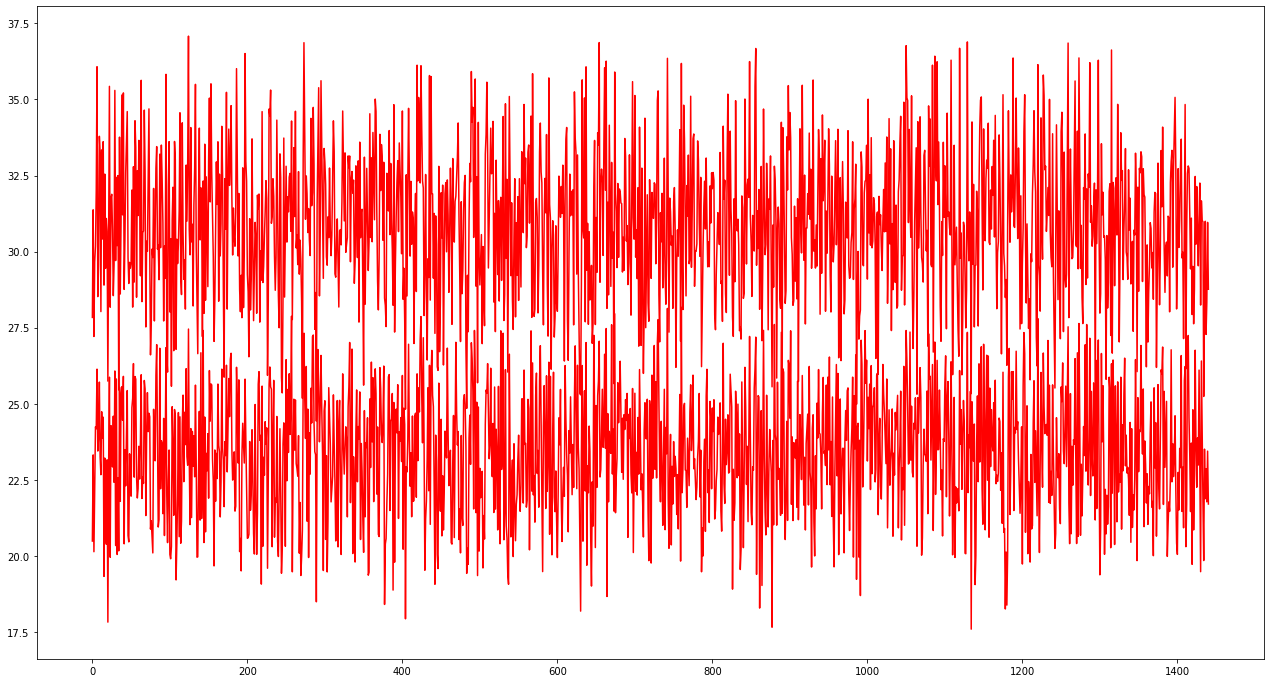

In [46]:
plt.figure(figsize=[22,12])
plt.plot(predgcv,color='r')
plt.show()

In [38]:
#Saving Model
import joblib
joblib.dump(gcv.best_estimator_,'Temperature_Prediction.pk1')

['Temperature_Prediction.pk1']

# Conclusion

In this project we have observed that Linear Regression is the best fit  model with accuracy score of 78%.

We also find some null values in the dataset which we replaced with 0 value.

Some outliers are also observed in the datset which is aboved tried to remove successufully.

We also tried to understand the test prediction in graphical form. In graph its clearly shown that minimum temperature range is around 20 to 25 while maximum temperature is between around 28 to 35